# ЛАБОРАТОРНАЯ РАБОТА №2
## Предварительная обработка данных (Метеоритная защита Земли)
Выполнил студент группы 19-ИВТ-3 Марчус К.Р.

Вариант 5.

In [53]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('cneos_fireball_data.csv')
df.columns = ['date', 'latitude', 'longitude', 'altitude', 'velocity', 'vx', 'vy', 'vz', 'radiated_energy', 'impact_energy']
df.head()

,date,latitude,longitude,altitude,velocity,vx,vy,vz,radiated_energy,impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


# ЗАДАНИЕ 1
Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.

In [81]:
most_radiated_energy_row = df.iloc[df.radiated_energy.idxmax()]
print("Koordinaty pojavlenija meteorita s naiboljshej energijej")
print("Longitude (deg.) = ", most_radiated_energy_row.longitude)
print("Latitude (deg.) = ", most_radiated_energy_row.latitude)

Koordinaty pojavlenija meteorita s naiboljshej energijej
Longitude (deg.) =  61.1E
Latitude (deg.) =  54.8N


# ЗАДАНИЕ 2
Определите метеорит с максимальной и минимальной скоростью.

In [65]:
print("Meteorit s maksimaljnoj skorostju:")
print(df.iloc[df.velocity.idxmax()].velocity)
print("\nMeteorit s minimaljnoj skorostju:")
print(df.iloc[df.velocity.idxmin()].velocity)

Meteorit s maksimaljnoj skorostju:
49.0

Meteorit s minimaljnoj skorostju:
9.8


# ЗАДАНИЕ 3
Определите место максимальной концентрации метеоритов.

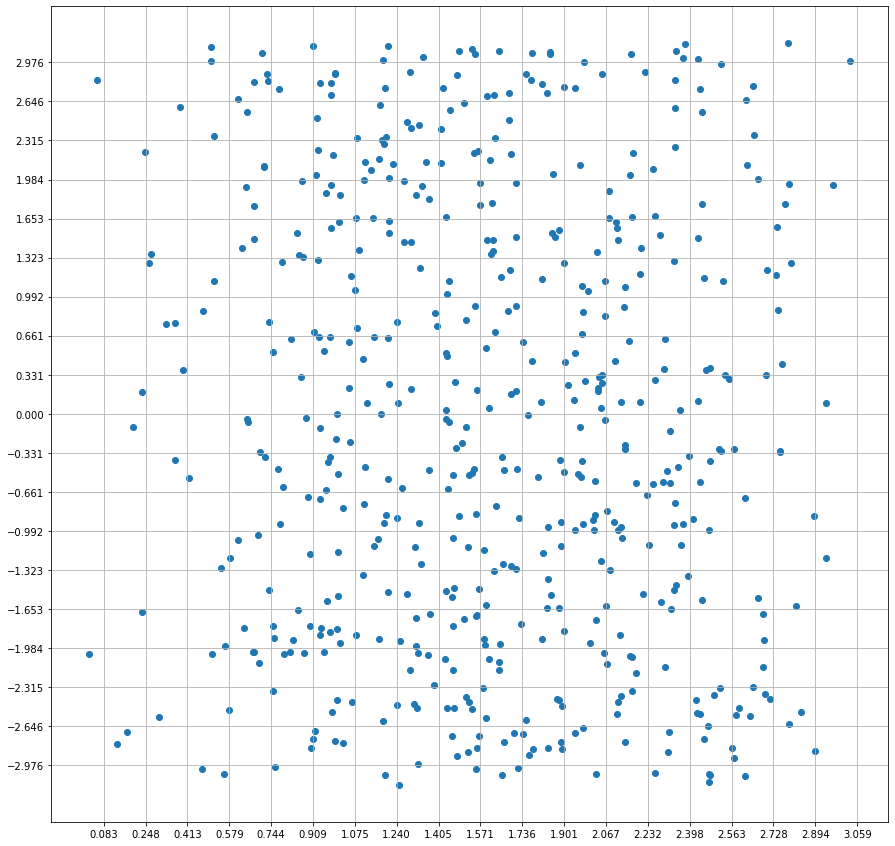

In [79]:
df_copy = df.dropna(subset=['latitude', 'longitude'])
latitude = df_copy['latitude'].apply(
    lambda lat: np.pi / 2 - np.radians(float(lat[:-1]) * (1 if lat[-1] == 'N' else -1)))
lat_bins = np.linspace(0, np.pi, 20)
lat_frequences, lat_bins = np.histogram(latitude, lat_bins)
lat_bins = (lat_bins[1:] + lat_bins[:-1])/2

longitude = df_copy['longitude'].apply(
    lambda lon: np.radians(float(lon[:-1]) * (1 if lon[-1] == 'W' else -1)))
lon_bins = np.linspace(-np.pi, np.pi, 20)
lon_frequences, lon_bins = np.histogram(longitude, lon_bins)
lon_bins = (lon_bins[1:] + lon_bins[:-1])/2

fig = plt.figure(figsize=(15,15))
ax = fig.gca()
ax.set_xticks(lat_bins)
ax.set_yticks(lon_bins)
plt.scatter(latitude, longitude, marker='o')
plt.grid()
plt.show()

# ЗАДАНИЕ 4
Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.

Vremae goda s naiboljshej verojatnostju pojavlenija meteoritov(0.25312934631432543): osenj


<AxesSubplot:>

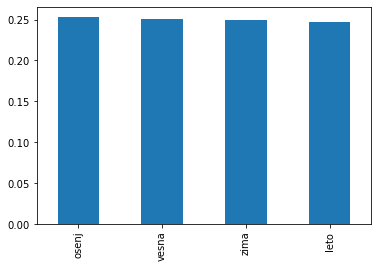

In [66]:
from datetime import datetime
df.date = pd.to_datetime(df.date)
seasons = df.date.apply(lambda dt: (dt.month%12 + 3)//3).apply(lambda season: {1: 'zima', 2: 'vesna', 3: 'leto', 4: 'osenj'}[season]).value_counts().apply(lambda count: count/df.shape[0])
print('Vremae goda s naiboljshej verojatnostju pojavlenija meteoritov({}): {}'.format(seasons.max(), seasons.idxmax()))
seasons.plot(kind='bar')

# ЗАДАНИЕ 5
Удалите строки данных, в которых для метеоритов не указана скорость

In [117]:
df.head(2048) #было

,date,latitude,longitude,altitude,velocity,vx,vy,vz,radiated_energy,impact_energy
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.190
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
...,...,...,...,...,...,...,...,...,...,...
714,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
715,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
716,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
717,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [118]:
df.dropna(subset=['vx', 'vy', 'vz']).head(2048) #стало

,date,latitude,longitude,altitude,velocity,vx,vy,vz,radiated_energy,impact_energy
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
5,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60
...,...,...,...,...,...,...,...,...,...,...
450,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
451,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
462,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
467,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60


# ЗАДАНИЕ 6
Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

<AxesSubplot:>

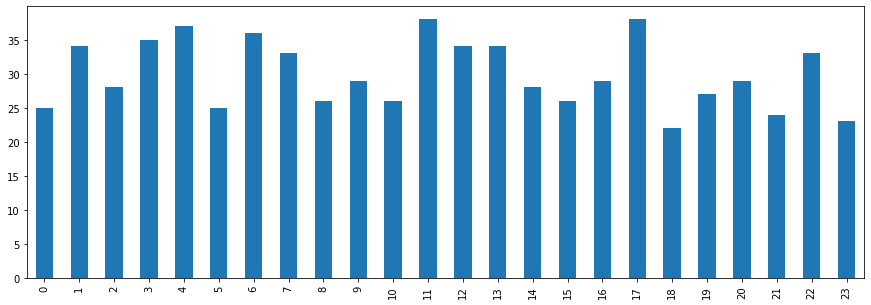

In [122]:
hours = df.date.apply(lambda date: date.hour).value_counts(sort=False)
hours.plot(kind='bar', sort_columns=True, figsize=(15,5))

# ЗАДАНИЕ 7
Заполните строки в которых для метеоритов не указана скорость.

In [60]:
df[['vx', 'vy', 'vz']].fillna(df.mode().iloc[0]).head()

,vx,vy,vz
0,-15.3,-12.1,8.8
1,-0.4,8.7,-14.8
2,-10.0,-6.5,-6.8
3,10.9,-9.7,4.2
4,17.7,13.1,-10.3


# ЗАДАНИЕ 8
Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

Mesaec v godu s naiboljshej verojatnostju pojavlenija meteoritov(0.09040333796940195): Nojabrj


<AxesSubplot:>

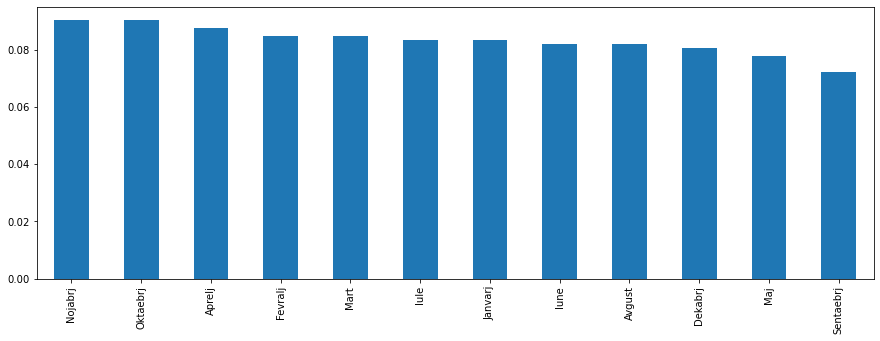

In [123]:
months_dict = {1: 'Janvarj', 2: 'Fevralj', 3: 'Mart', 4: 'Aprelj', 5: 'Maj', 6: 'Iune', 7: 'Iule', 8: 'Avgust', 9: 'Sentaebrj', 10: 'Oktaebrj', 11: 'Nojabrj', 12: 'Dekabrj'}
months = df.date.apply(lambda date: months_dict[date.month]).value_counts().apply(lambda count: count/df.shape[0])
print('Mesaec v godu s naiboljshej verojatnostju pojavlenija meteoritov({}): {}'.format(months.max(), months.idxmax()))
months.plot(kind='bar', figsize=(15,5))

# ЗАДАНИЕ 9
Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [69]:
df_copy = df.dropna(subset=['altitude', 'radiated_energy'])

pearson_correlation, pearson_pvalue = stats.pearsonr(df_copy['altitude'], df_copy['radiated_energy'])
print('Pirson:')
print('Korrelaecija - ', pearson_correlation)
print('p-znachenije - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = stats.spearmanr(df_copy['altitude'], df_copy['radiated_energy'])
print('\nSpirman:')
print('Korrelaecija - ', spearman_correlation)
print('p-znachenije - ', spearman_pvalue)

Pirson:
Korrelaecija -  -0.08578656525823586
p-znachenije -  0.13368269878711372

Spirman:
Korrelaecija -  -0.12671041939219074
p-znachenije -  0.026415728610676672


<AxesSubplot:>

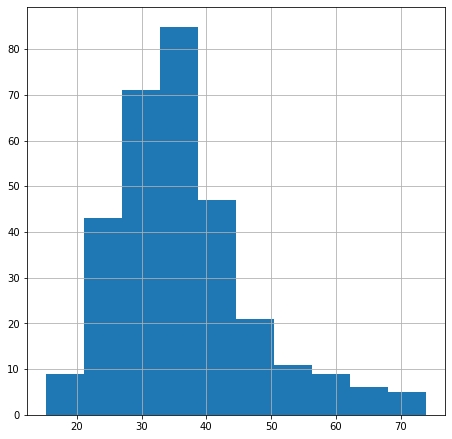

In [126]:
df_copy['altitude'].hist(figsize=(7.5,7.5))

<AxesSubplot:>

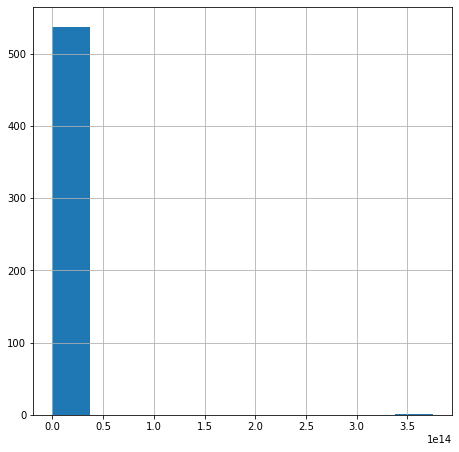

In [127]:
df_copy['radiated_energy'].hist(figsize=(7.5,7.5))